In [1]:
%matplotlib inline
import uproot
import hist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
import plotly.express as px
import seaborn as sns

In [26]:
fileEx = uproot.open("/global/homes/v/vsharma2/Git/Position_reconstruction/output/ds3615_M2_3_6_MeV.root")

In [25]:
fileEx['outputTree'].show()

NameError: name 'fileEx' is not defined

### Files with cuts on total energy

In [24]:
fileArray = [uproot.open(("/global/homes/v/vsharma2/Git/Position_reconstruction/output/ds{}_M2_3_6_MeV_total.root".format(i))) for i in range(3601, 3616)]
treeArray = [fileArray[i]['outputTree'] for i in range(0, 15)]
arrays = [treeArray[i].arrays(['IsNear', 'riseTime', 'decayTime', 'delay', 'TVL', 'TVR'], library='pd') for i in range(0, 15)]

FileNotFoundError: file not found

    '/global/homes/v/vsharma2/Git/Position_reconstruction/output/ds3601_M2_3_6_MeV_total.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


### Plot distribution of near events and far events

In [27]:
def plotDistribution(arrays):
    nearCounts = [np.count_nonzero(arrays[i]['IsNear']) for i in range(0, 15)]
    farCounts = [np.size(arrays[i]['IsNear']) - np.count_nonzero(arrays[i]['IsNear']) for i in range(0, 15)]
    percentages = [(nearCounts[i] * 100)/(nearCounts[i] + farCounts[i]) for i in range(0,15)]
    # set width of bar
    barWidth = 0.25
    fig, ax = plt.subplots(figsize =(16, 8))
 
    # Set position of bar on X axis
    br1 = np.arange(len(nearCounts))
    br2 = [x + barWidth for x in br1]
    #br3 = [x + barWidth for x in br2]
 
    # Make the plot
    plt.bar(br1, nearCounts, color ='gray', width = barWidth, edgecolor ='grey', label ='nearCounts')
    plt.bar(br2, farCounts, color ='teal', width = barWidth, edgecolor ='grey', label ='farCounts')
    #plt.bar(br3, CSE, color ='b', width = barWidth,
    #edgecolor ='grey', label ='CSE')

    # Adding Xticks
    plt.xlabel('Dataset', fontweight ='bold', fontsize = 15)
    plt.ylabel('Counts', fontweight ='bold', fontsize = 15)
    #plt.xticks([r + barWidth for r in range(len(IT))],
    #['2015', '2016', '2017', '2018', '2019'])
    plt.xticks([r + barWidth for r in range(len(nearCounts))], [i for i in range(3601,3616)])
    plt.yticks(np.arange(0, max(farCounts)+1000, 200))
    pairs = zip(nearCounts, percentages)
    for i, values in enumerate(pairs):
        plt.text(i, values[0] + 500, f"{values[1]:.1f}%", ha='right', va='top')
    plt.legend()
    plt.show()

### Plotting variables

In [28]:
def plot_columns(df, bool_col):
    # Create a list of all column names in the dataframe
    column_names = list(df.columns)

    # Remove the boolean column from the list of column names
    column_names.remove(bool_col)
    
    fig, ax = plt.subplots()
    markers = ['o', 'x']
    # Loop through all pairs of columns
    for i in range(len(column_names)):
        for j in range(i+1, len(column_names)):
            # Create a scatter plot of the two columns, with markers based on the boolean column
            plt.scatter(df[column_names[i]], df[column_names[j]], c=df[bool_col].map({True: 'limegreen', False: 'steelblue'}), alpha=0.8)

            # Set the axis labels and title
            plt.xlabel(column_names[i])
            plt.ylabel(column_names[j])
            plt.title(f'{column_names[i]} vs {column_names[j]}')
            ax.legend(handles=[plt.Line2D([], [], marker='o', color='limegreen', label='Near'), plt.Line2D([], [], marker='o', color='steelblue', label='Far')],title=bool_col)
            # Display the plot
            plt.show()

In [44]:
def analyseDataset(arrays):
    df = pd.concat(arrays)
    print(f"Size of dataset -- {len(df)}")
    print(f"Size of near dataset -- {len(df.query('IsNear==True'))}")
    print(f"Size of near dataset -- {len(df.query('IsNear==False'))}")
    number_inf = df[df == np.inf].count()
    print("Number of inf values:")
    print(f"{number_inf}")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna()
    print("Maximum values of fields after removing inf values are:")
    print(df.max())
    fig, ax = plt.subplots(1,5, figsize=(20,5))
    df.hist(bins=1000, figsize=(20,15), range=[-25,25], ax=ax)
    fig.supxlabel('Time')
    indexL = df[ (df['riseTime'] > 50) | (df['riseTime'] < -50) | (df['decayTime'] > 50) | (df['decayTime'] < -50) | (df['delay'] > 50) | (df['delay'] < -50) | (df['TVL'] > 50) | (df['TVL'] < -50) | (df['TVR'] > 50) | (df['TVR'] < -50)].index
    df_filtered = df.drop(indexL)
    print(f"Size of dataset -- {len(df_filtered)}")
    print(f"Size of near dataset -- {len(df_filtered.query('IsNear==True'))}")
    print(f"Size of near dataset -- {len(df_filtered.query('IsNear==False'))}")
    plot_columns(df_filtered, 'IsNear')

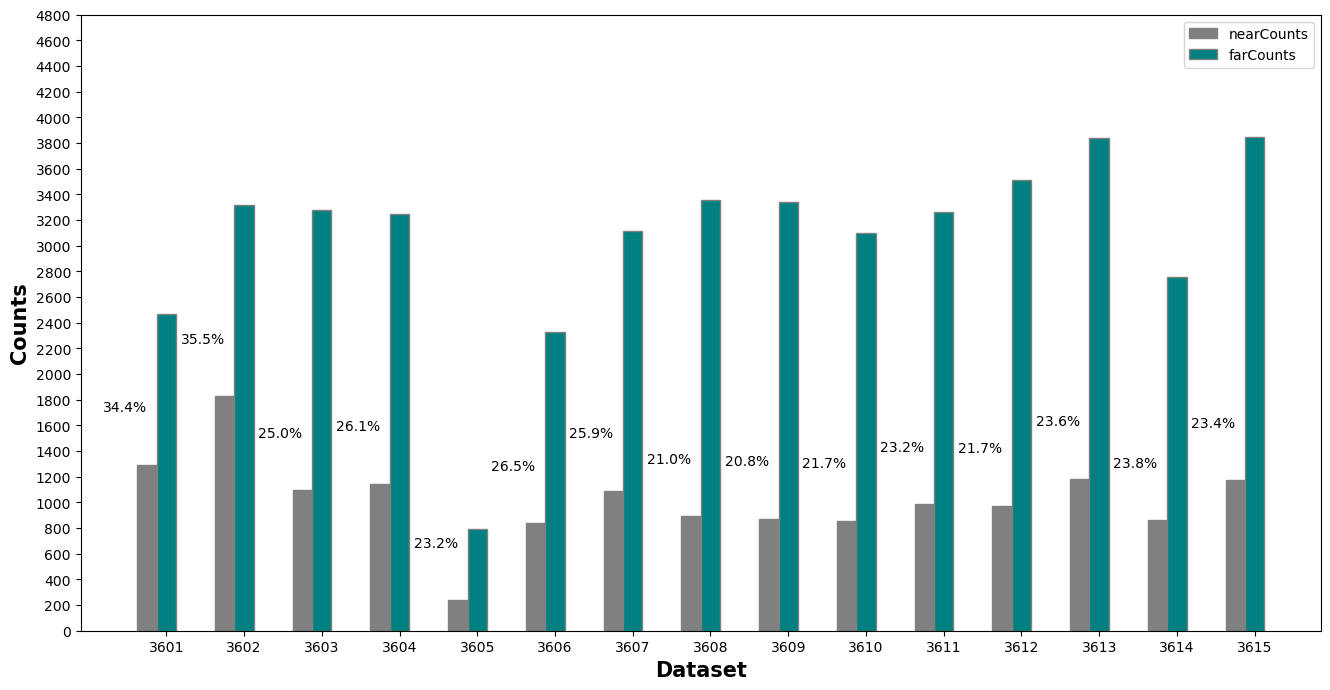

In [30]:
plotDistribution(arrays)

Length of dataset -- 60901
Number of inf values:
IsNear       0
riseTime     0
decayTime    0
delay        0
TVL          0
TVR          0
dtype: int64
Maximum values of fields after removing inf values are:
IsNear                        True
riseTime               1080.769819
decayTime     534903985883489344.0
delay                    316.24186
TVL          13678220236113.478516
TVR                   29445.378595
dtype: object


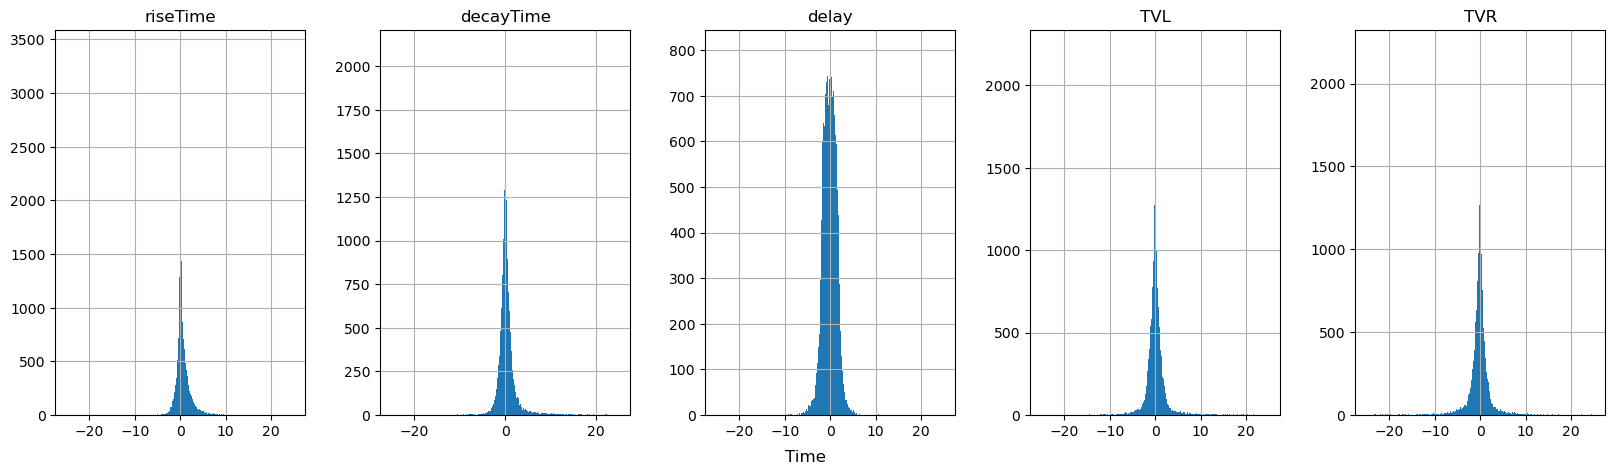

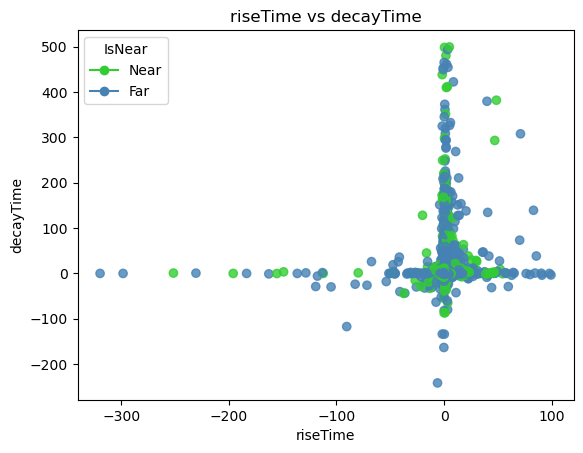

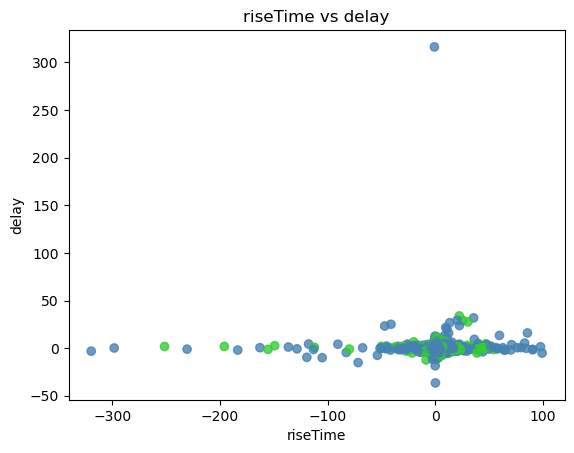

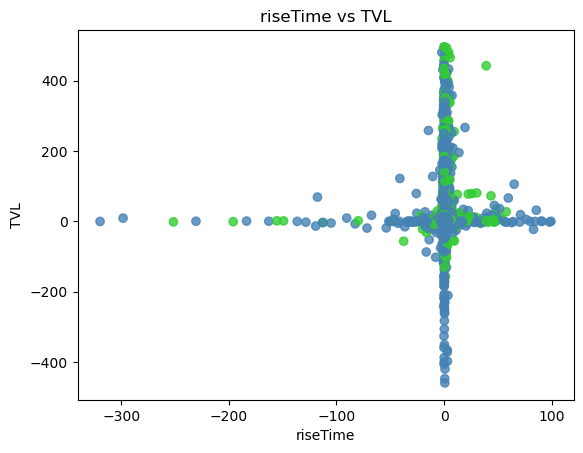

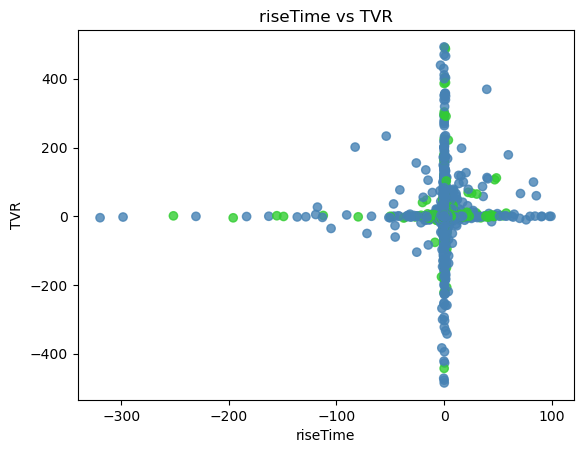

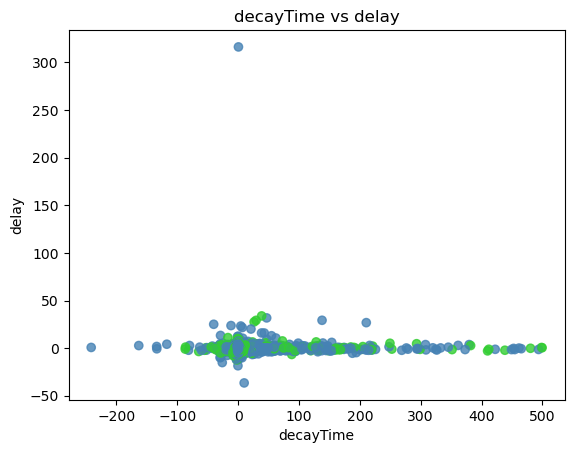

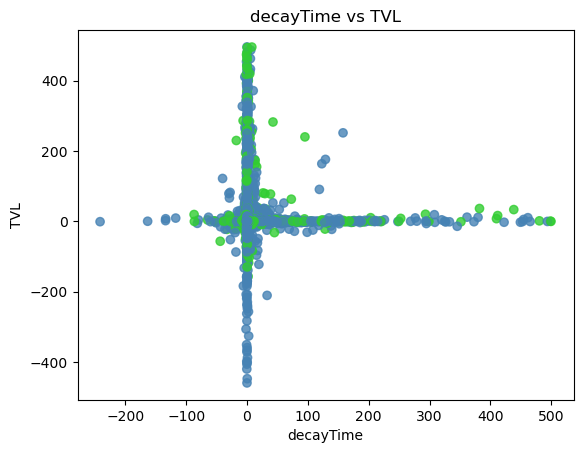

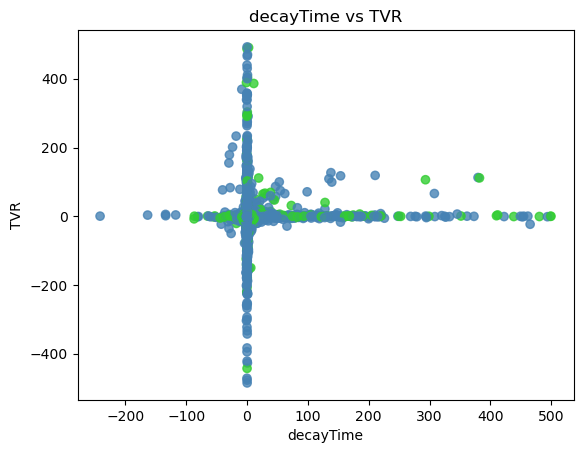

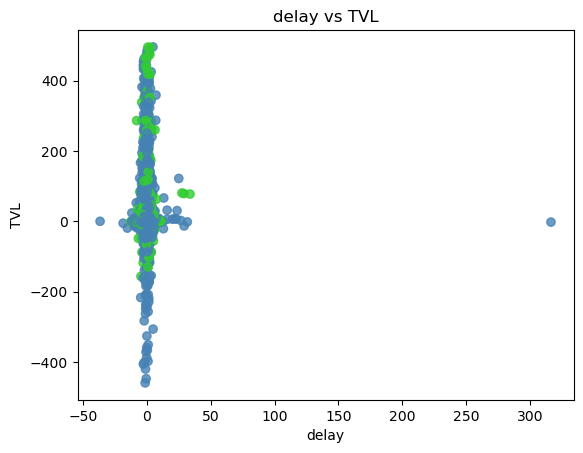

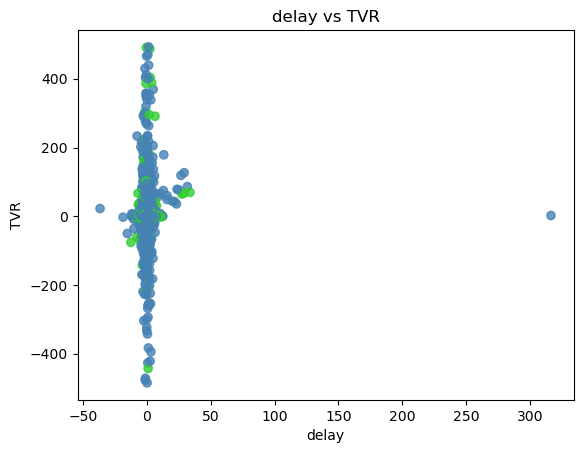

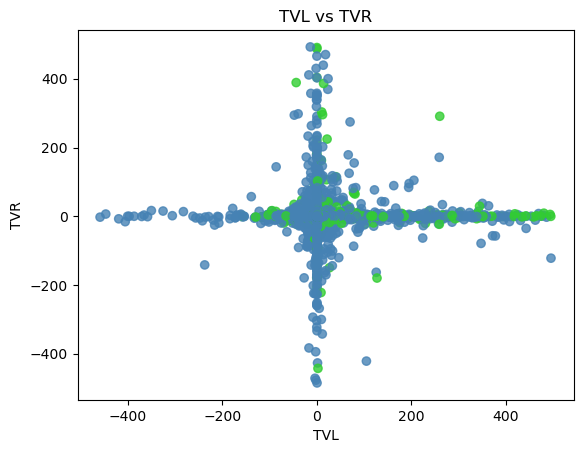

In [20]:
analyseDataset(arrays)

### Files with cuts on individual energy

In [31]:
fileArray1 = [uproot.open(("/global/homes/v/vsharma2/Git/Position_reconstruction/output/ds{}_M2_3_6_MeV.root".format(i))) for i in range(3601, 3616)]
treeArray1 = [fileArray1[i]['outputTree'] for i in range(0, 15)]
arrays1 = [treeArray1[i].arrays(['IsNear', 'riseTime', 'decayTime', 'delay', 'TVL', 'TVR'], library='pd') for i in range(0, 15)]

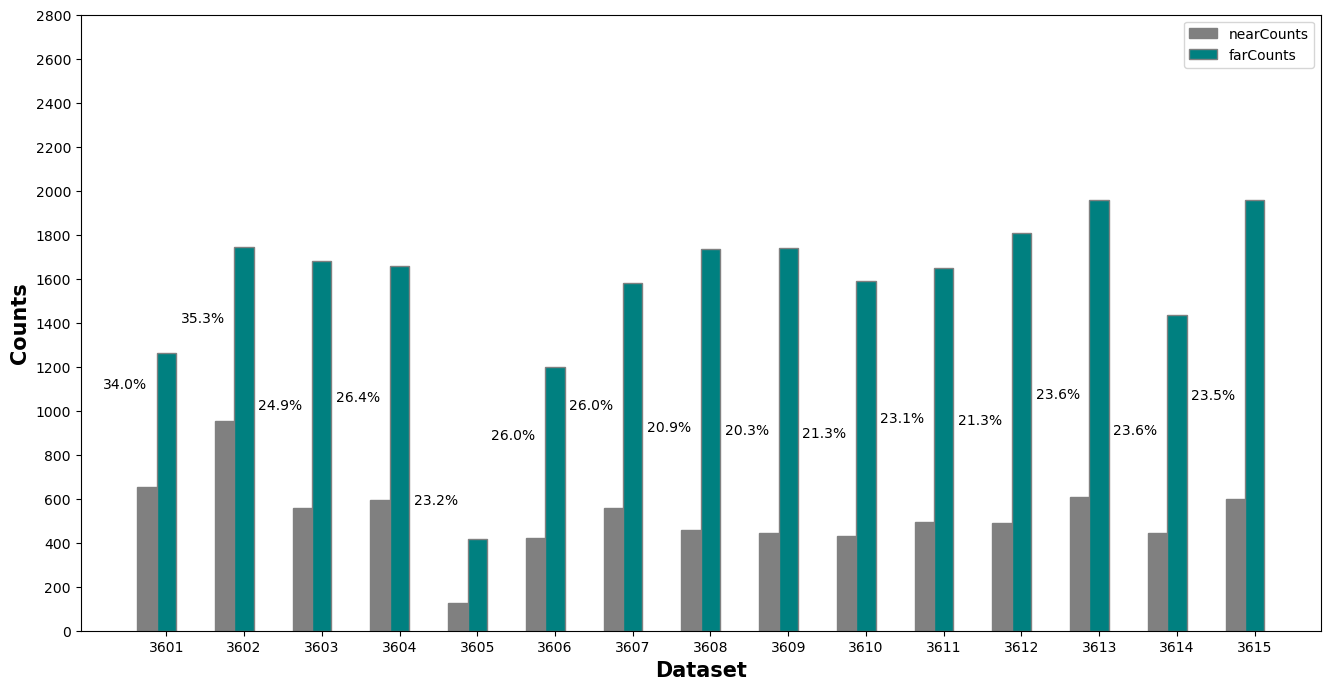

In [32]:
plotDistribution(arrays1)

Size of dataset -- 31243
Size of near dataset -- 7826
Size of near dataset -- 23417
Number of inf values:
IsNear       0
riseTime     0
decayTime    0
delay        0
TVL          0
TVR          0
dtype: int64
Maximum values of fields after removing inf values are:
IsNear              True
riseTime      934.726609
decayTime    2061.240294
delay         117.589131
TVL           362.449208
TVR           401.266525
dtype: object
Size of dataset -- 30663
Size of near dataset -- 7685
Size of near dataset -- 22978


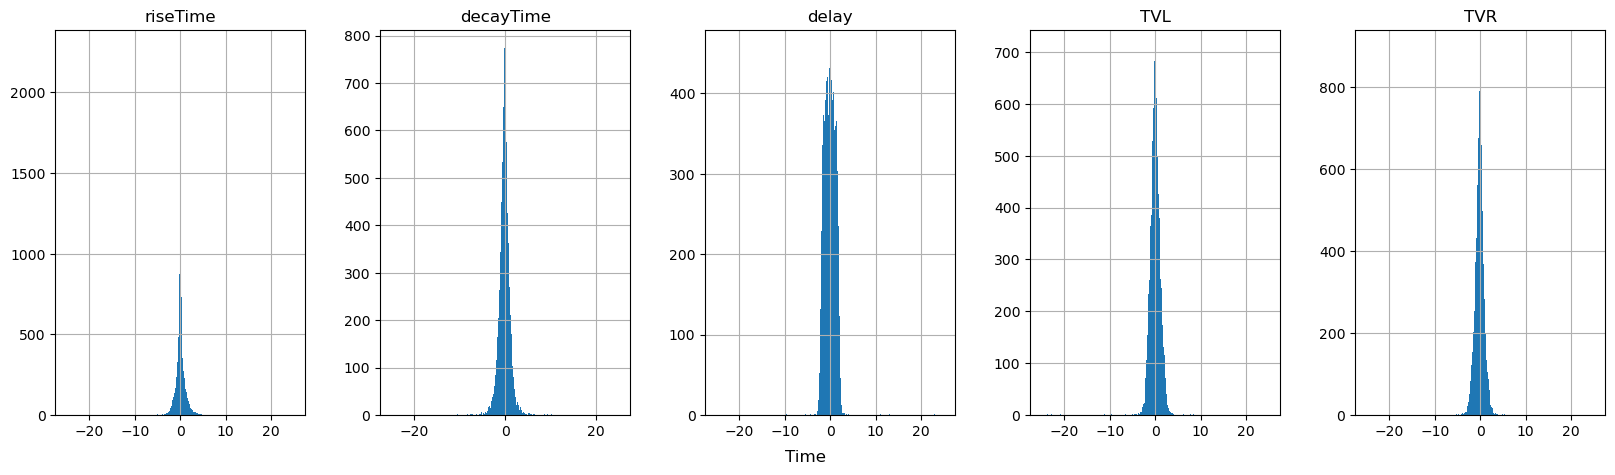

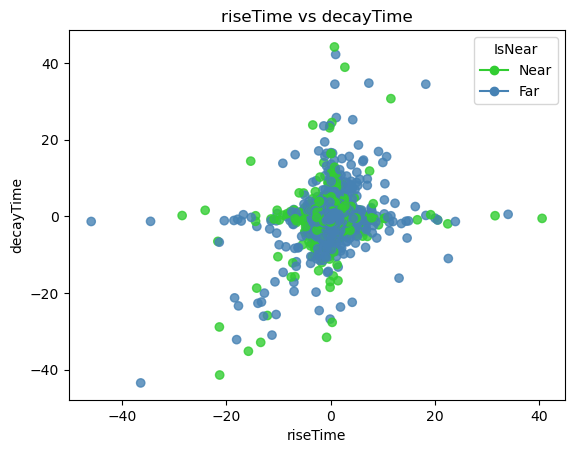

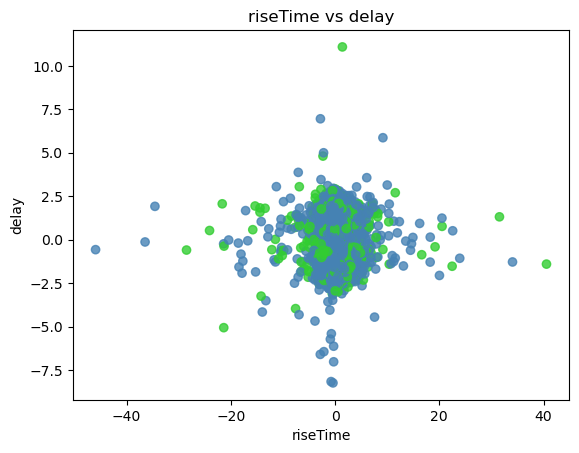

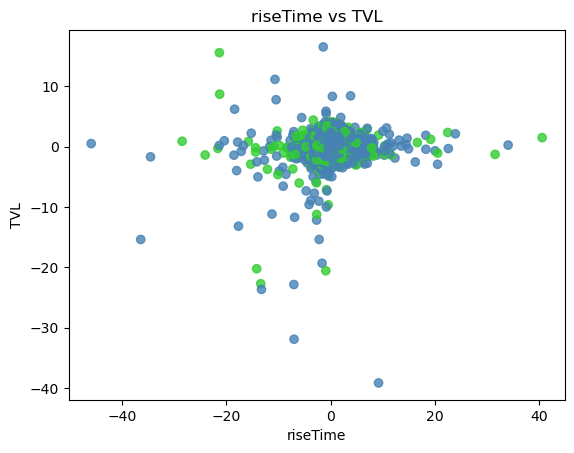

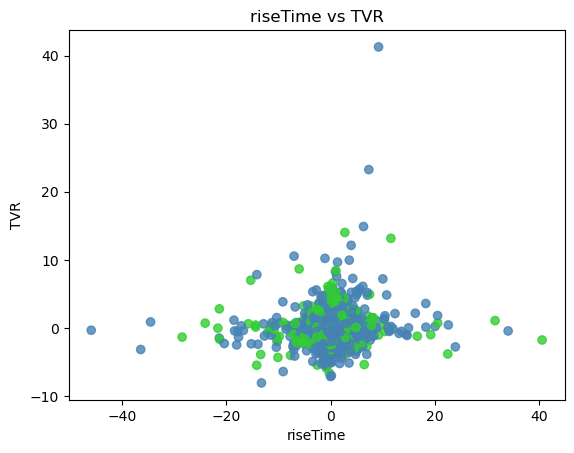

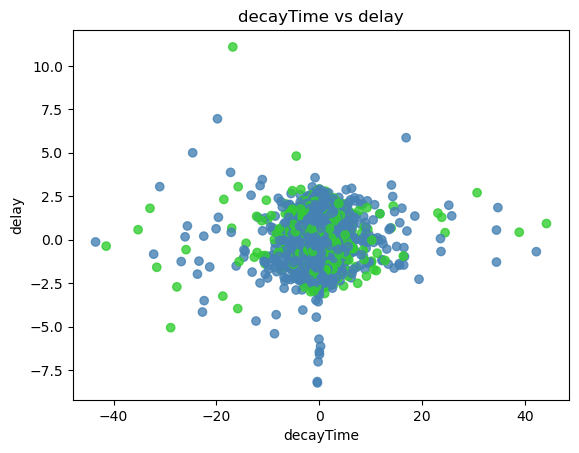

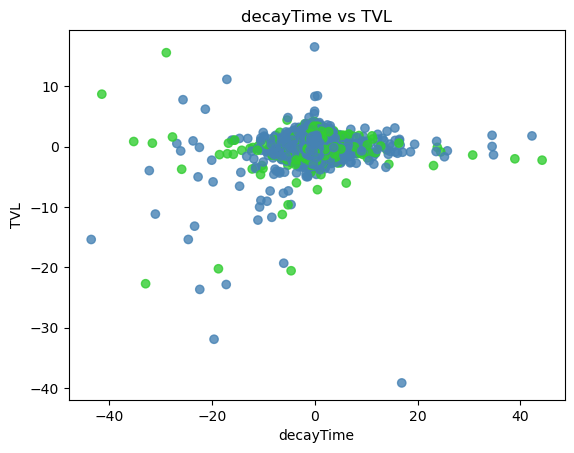

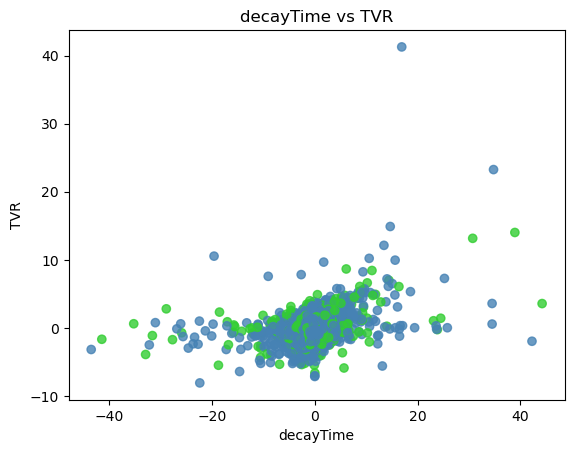

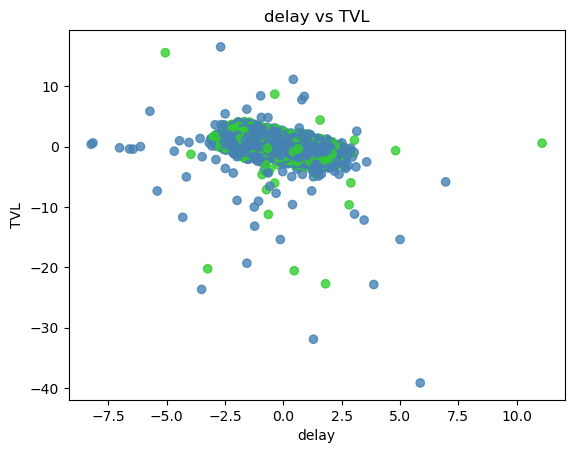

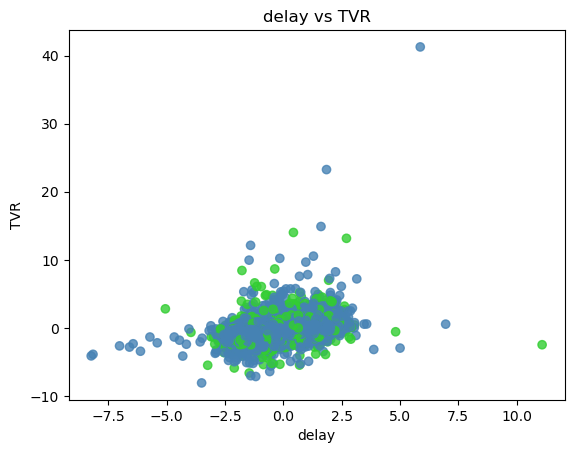

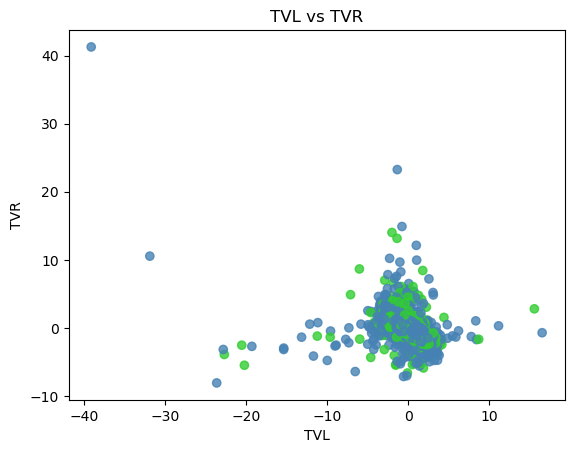

In [45]:
analyseDataset(arrays1)